# 🏥 Modelo de Predicción de Primas de Seguros

## 📋 Descripción del Proyecto

Como parte del **equipo de tarifación de una aseguradora**, se requiere construir un modelo predictivo que pueda pronosticar el valor de la prima de un asegurado con una precisión específica.

### 🎯 Objetivo
Desarrollar un modelo que logre un **MAPE ≤ 15%** para la predicción del valor de las primas de seguros.

## 📊 Diccionario de Datos

El conjunto de datos contiene las siguientes variables:

| Variable | Descripción |
|----------|-------------|
| **Age** | Edad del asegurado |
| **Sex** | Género del asegurado |
| **Bmi** | Índice de masa corporal del asegurado |
| **Children** | Número de hijos del asegurado |
| **Smoker** | El asegurado es o no fumador |
| **Region** | Región comercial a la que pertenece el asegurado |
| **Charges** | Valor de la prima del asegurado *(Variable objetivo)* |

### 📈 Métrica de Evaluación
- **MAPE** (Mean Absolute Percentage Error) ≤ 15%

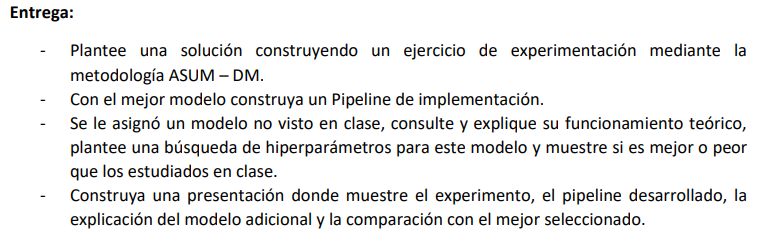

# 4. Recolección de Datos

In [1]:
import pandas as pd
import numpy as np
import warnings

import seaborn as sb
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

data = pd.read_csv('datos_caso_3.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# 5. Entendimiento de los Datos
- Conocer nuestra variable y
- Analisis univariado y multivariado

## Variable Y (charges)

In [3]:
target = 'charges'

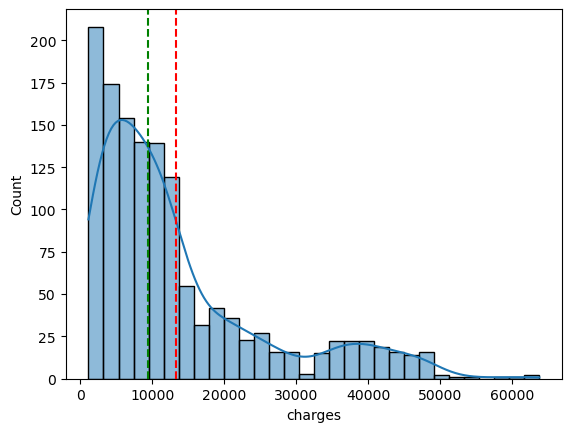

In [4]:
sb.histplot(data = data, x = target, kde = True)
plt.axvline(x = data[target].mean(), color = 'red', linestyle = 'dashed')
plt.axvline(x = data[target].median(), color = 'green', linestyle = 'dashed')
plt.show()

## Exploración univariada de los datos

### Variables numericas

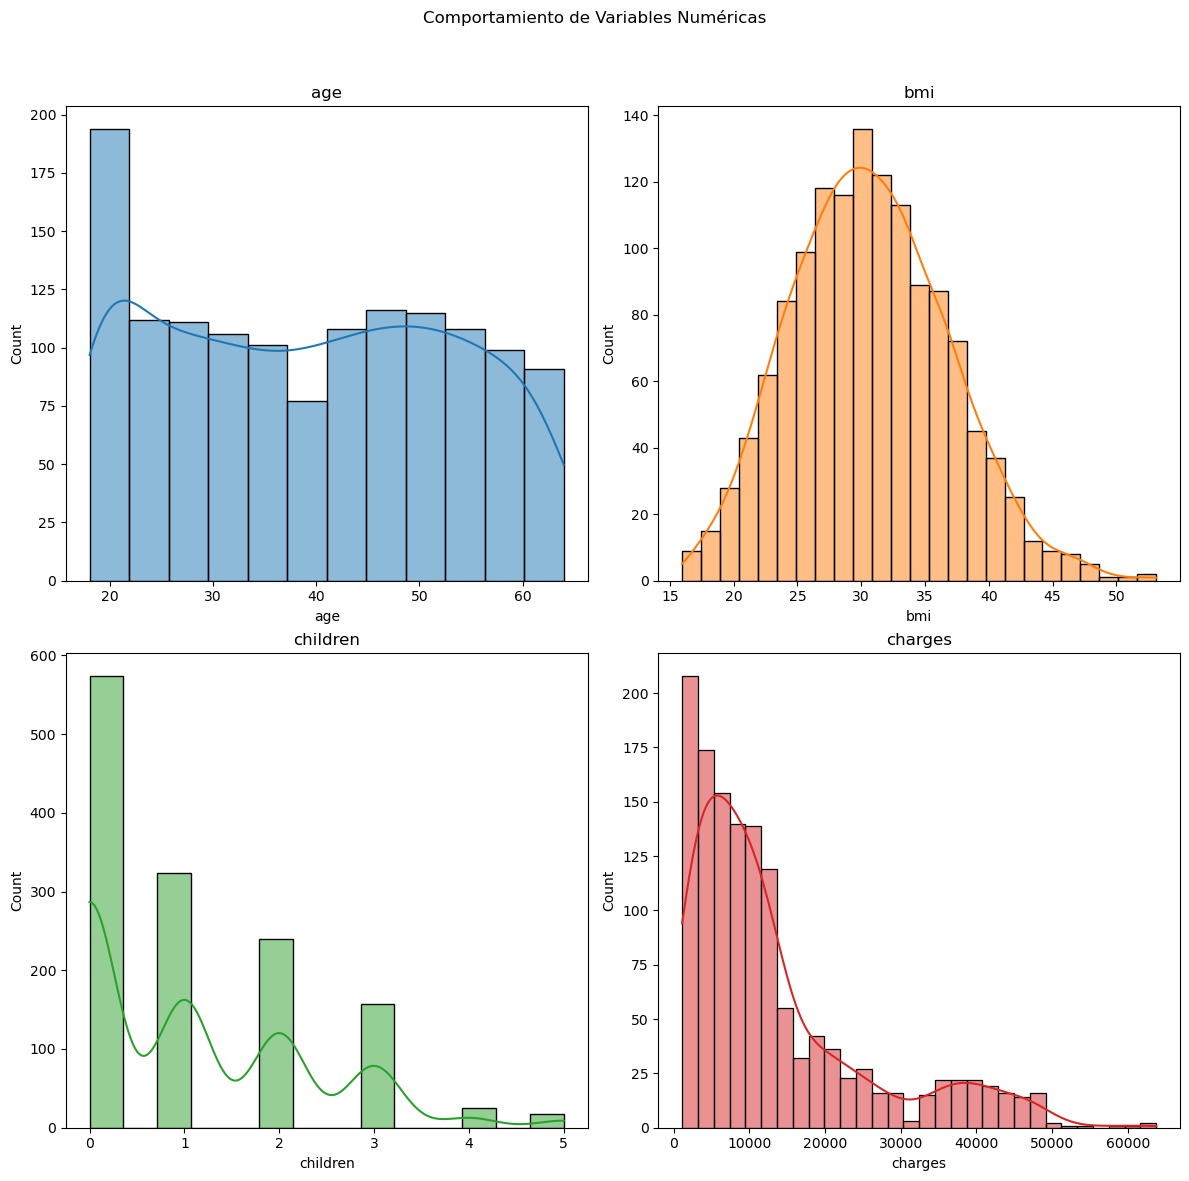

In [5]:
fig, ax = plt.subplots(2, 2, figsize = (12, 12))
ax = ax.flat
num_col = data.select_dtypes(include = ['int64', 'float64']).columns

for i, col in enumerate(num_col):
  sb.histplot(
    data = data,
    x = col, 
    kde = True,
    color = (list(plt.rcParams['axes.prop_cycle']) * 7)[i]['color'],
    ax = ax[i]
  )
  ax[i].set_title(col)

fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle('Comportamiento de Variables Numéricas')
plt.show()

### Variables categoricas

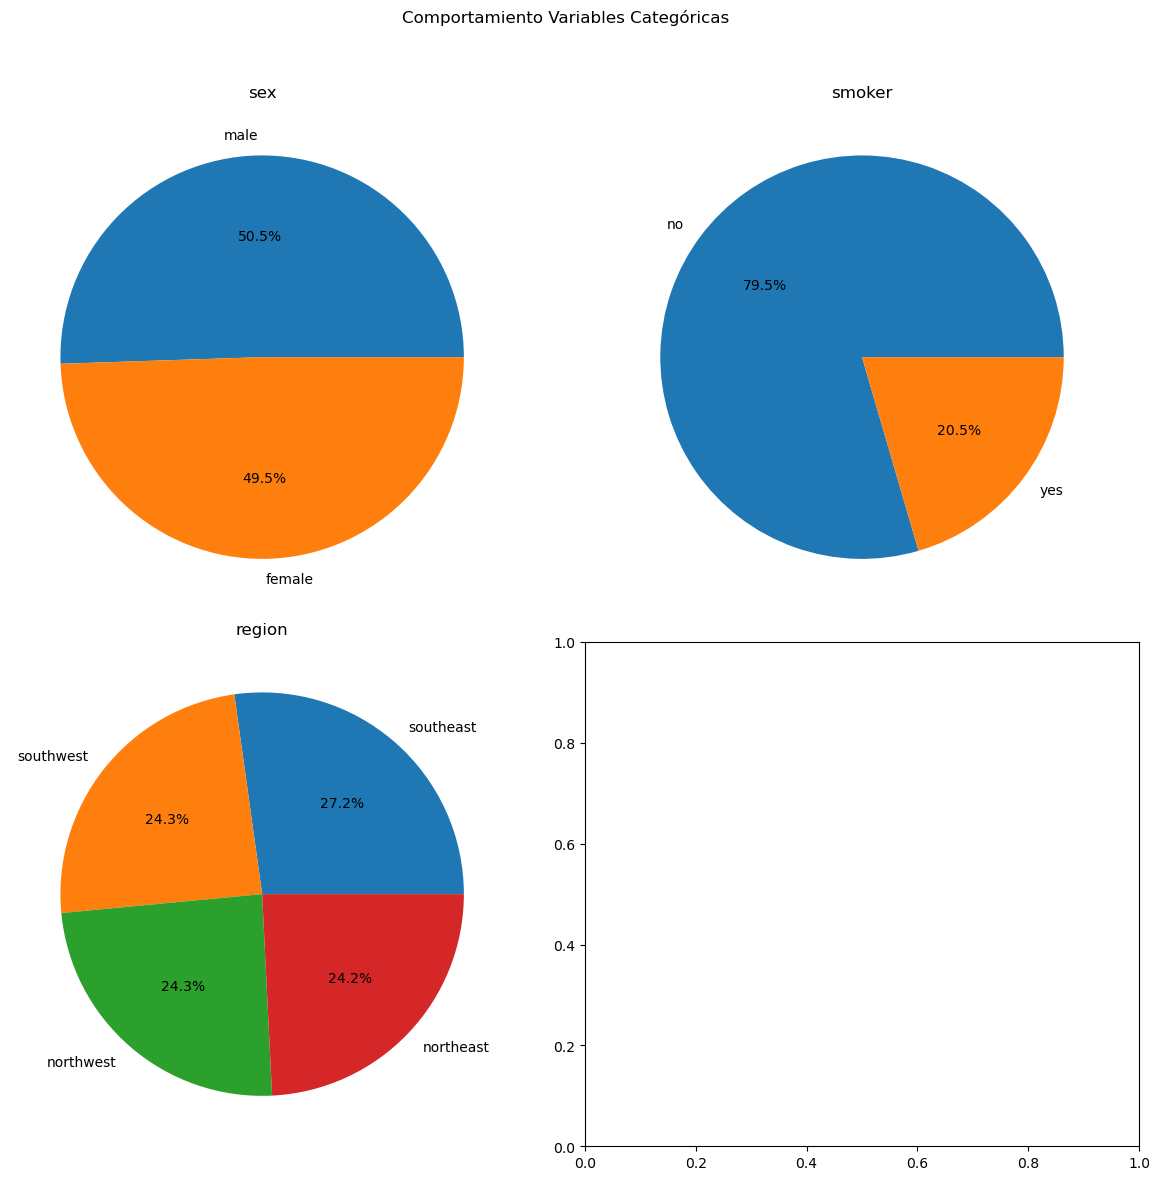

In [6]:
fig, ax = plt.subplots(2, 2, figsize = (12, 12))
ax = ax.flat
cat_col = data.select_dtypes(include = ['object']).columns

for i, col in enumerate(cat_col):
  ax[i].pie(x = data[col].value_counts(), labels = data[col].value_counts().index, autopct = '%0.1f%%')
  ax[i].set_title(col)

fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle("Comportamiento Variables Categóricas")
plt.show()

## Correlacion

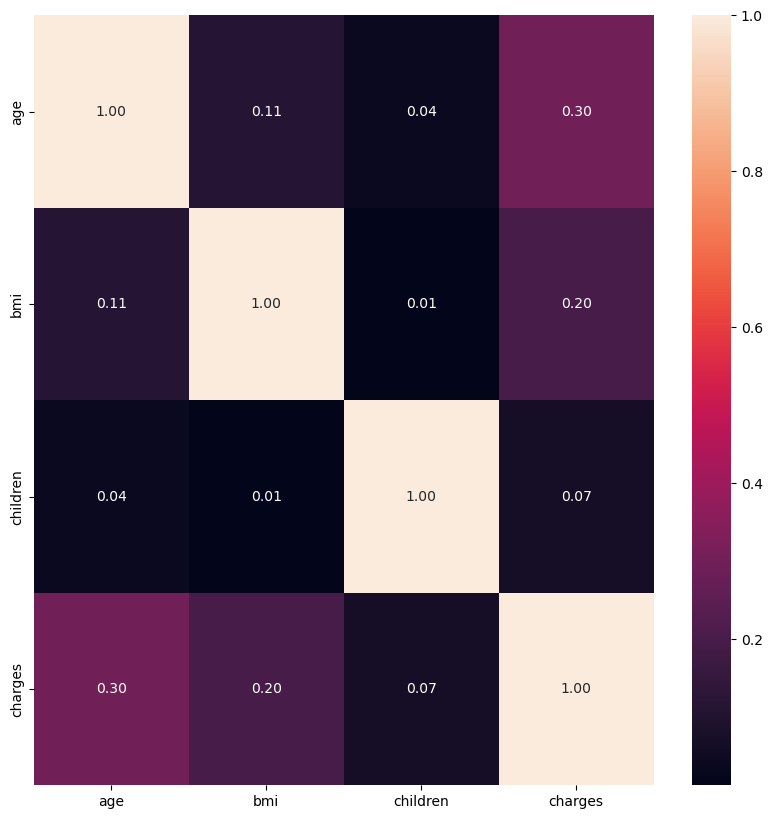

In [7]:
plt.figure(figsize=(10, 10))
sb.heatmap(data.corr(numeric_only = True), annot=True, fmt='.2f')
plt.show()

# 6. Preparación de los Datos

## Pipeline

In [8]:
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

In [9]:
num_col = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_col = data.select_dtypes(include=['object']).columns.tolist()

num_transformer = Pipeline(steps = [('scaler', MinMaxScaler())])
cat_transformer = Pipeline(steps = [('encoder', OneHotEncoder())])

preprocessor = ColumnTransformer(
  transformers=[
    ('num', num_transformer, num_col),
    ('cat', cat_transformer, cat_col)
  ],
  remainder='passthrough'
)
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['age', 'bmi', 'children', 'charges']),
                                ('cat',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 ['sex', 'smoker', 'region'])])

In [10]:
data_pre = preprocessor.fit_transform(data)

cod_cat = preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(cat_col)
labels = np.concatenate([num_col, cod_cat])

data_pro = pd.DataFrame(data_pre, columns=labels)
data_pro

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,0.251611,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,0.009636,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,0.053115,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,0.333010,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,0.043816,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,0.151299,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,0.000000,0.429379,0.0,0.017305,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,0.000000,0.562012,0.0,0.008108,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,0.065217,0.264730,0.0,0.014144,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Separacion variables X y Y

In [11]:
X = data_pro.drop(columns = target, axis = 1)
y = data_pro[target]

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)
print(f'El tamaño del conjunto de prueba es: {X_test.shape} {y_test.shape}')
print(f'El tamaño del conjunto de entrenamiento es: {X_train.shape} {y_train.shape}')

El tamaño del conjunto de prueba es: (937, 11) (937,)
El tamaño del conjunto de entrenamiento es: (401, 11) (401,)


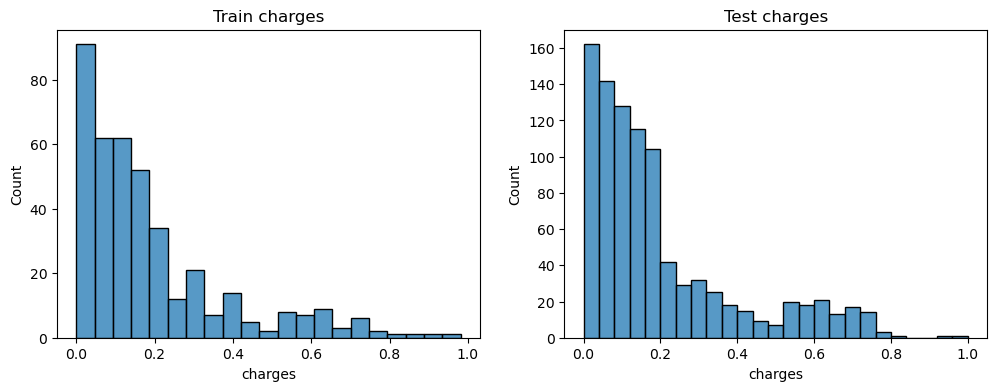

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sb.histplot(y_train, ax=ax[0])
ax[0].set_title(f'Train {target}')

sb.histplot(y_test, ax=ax[1])
ax[1].set_title(f'Test {target}')

plt.show()

# 7. Modelado

- Regresion lineal
- K vecinos mas cercanos
- Maquina de soporte vectorial
- Arboles de decision
- Random Forest
- Gradient Boosting
- Percepcion Multicapa

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Regresion lineal

In [15]:
modelo_1 = LinearRegression()
modelo_1.fit(X_train, y_train)

LinearRegression()

In [16]:
modelo_1.coef_

array([ 0.18097249,  0.23585914,  0.03485199,  0.00491844, -0.00491844,
       -0.18731483,  0.18731483,  0.01015274,  0.00392172, -0.00937204,
       -0.00470242])

In [17]:
modelo_1.intercept_

np.float64(0.12367307183287478)

## K Vecinos más cercanos

In [18]:
modelo_2 = KNeighborsRegressor()

param_grid = {
  'n_neighbors': [2, 5, 9, 15, 25, 40, 35],
  'p': [1, 2],
}

reg_2 = GridSearchCV(estimator=modelo_2, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_percentage_error')
reg_2.fit(X_train, y_train)

validation = pd.concat(
  [
    pd.DataFrame(reg_2.cv_results_['params']),
    pd.DataFrame(reg_2.cv_results_['mean_test_score'], columns=['MAPE'])
  ],
  axis=1
)
validation.sort_values('MAPE', ascending=False)

# Al usar MAPE, el mejor es el valor más cercano a 0, pero como sklearn usa el negativo, el mejor es el más cercano a 0 por la izquierda (el menos negativo)

,n_neighbors,p,MAPE
2,5,1,-1.667921
3,5,2,-1.714984
4,9,1,-2.365938
5,9,2,-2.381699
7,15,2,-2.776707
0,2,1,-2.874222
6,15,1,-2.917016
1,2,2,-2.954791
10,40,1,-3.277307
11,40,2,-3.409582


In [19]:
modelo_2_final = reg_2.best_estimator_
modelo_2_final

KNeighborsRegressor(p=1)

## Maquina de soporte Vectorial

In [20]:
modelo_3 = SVR()

param_grid = {
  'C': [0, 0.01, 1, 10, 100],
  'kernel': ['linear', 'poly', 'rbf'],
  'degree': [2, 3]
}

reg_3 = GridSearchCV(estimator=modelo_3, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_percentage_error')
reg_3.fit(X_train, y_train)

validation = pd.concat(
  [
    pd.DataFrame(reg_3.cv_results_['params']),
    pd.DataFrame(reg_3.cv_results_['mean_test_score'], columns=['MAPE'])
  ],
  axis=1
)
validation.sort_values('MAPE', ascending=False)

# Al usar MAPE, el mejor es el valor más cercano a 0, pero como sklearn usa el negativo, el mejor es el más cercano a 0 por la izquierda (el menos negativo)

,C,degree,kernel,MAPE
18,10.00,2,linear,-2.328910
21,10.00,3,linear,-2.328910
24,100.00,2,linear,-2.336135
27,100.00,3,linear,-2.336135
12,1.00,2,linear,-2.362712
15,1.00,3,linear,-2.362712
22,10.00,3,poly,-3.582787
23,10.00,3,rbf,-3.626004
20,10.00,2,rbf,-3.626004
25,100.00,2,poly,-3.666736


In [21]:
modelo_3_final = reg_3.best_estimator_
modelo_3_final

SVR(C=10, degree=2, kernel='linear')

## Arbol de Regresion

In [22]:
modelo_4 = DecisionTreeRegressor(random_state=123)

param_grid = {
  'criterion': ['friedman_mse', 'poisson', 'squared_error', 'absolute_error'],
  'max_depth': [None, 5, 6, 3, 4, 10, 100],
  'max_leaf_nodes': [None, 2, 3, 4]
}

reg_4 = GridSearchCV(estimator=modelo_4, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_percentage_error')
reg_4.fit(X_train, y_train)

validation = pd.concat(
  [
    pd.DataFrame(reg_4.cv_results_['params']),
    pd.DataFrame(reg_4.cv_results_['mean_test_score'], columns=['MAPE'])
  ],
  axis=1
)
validation.sort_values('MAPE', ascending=False)

# Al usar MAPE, el mejor es el valor más cercano a 0, pero como sklearn usa el negativo, el mejor es el más cercano a 0 por la izquierda (el menos negativo)

,criterion,max_depth,max_leaf_nodes,MAPE
92,absolute_error,6.0,NaN,-0.525518
88,absolute_error,5.0,NaN,-0.538502
100,absolute_error,4.0,NaN,-0.594725
56,squared_error,NaN,NaN,-0.715257
80,squared_error,100.0,NaN,-0.715257
...,...,...,...,...
69,squared_error,3.0,2.0,-4.380384
53,poisson,100.0,2.0,-4.380384
49,poisson,10.0,2.0,-4.380384
57,squared_error,NaN,2.0,-4.380384


In [23]:
modelo_4_final = reg_4.best_estimator_
modelo_4_final

DecisionTreeRegressor(criterion='absolute_error', max_depth=6, random_state=123)

## Bosque Aleatorio

In [24]:
modelo_5 = RandomForestRegressor(random_state=123)

param_grid = {
  'n_estimators': [100, 200, 500],
  'criterion': ['friedman_mse', 'poisson', 'squared_error', 'absolute_error'],
  'max_depth': [None, 5, 6, 3, 4, 10, 100],
  'max_leaf_nodes': [None, 2, 3, 5]
}

reg_5 = GridSearchCV(estimator=modelo_5, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_percentage_error')
reg_5.fit(X_train, y_train)

validation = pd.concat(
  [
    pd.DataFrame(reg_5.cv_results_['params']),
    pd.DataFrame(reg_5.cv_results_['mean_test_score'], columns=['MAPE'])
  ],
  axis=1
)
validation.sort_values('MAPE', ascending=False)

,criterion,max_depth,max_leaf_nodes,n_estimators,MAPE
300,absolute_error,4.0,NaN,100,-0.590636
301,absolute_error,4.0,NaN,200,-0.590786
302,absolute_error,4.0,NaN,500,-0.592297
264,absolute_error,5.0,NaN,100,-0.613282
265,absolute_error,5.0,NaN,200,-0.617975
...,...,...,...,...,...
243,squared_error,100.0,2.0,100,-4.391727
51,friedman_mse,4.0,2.0,100,-4.391727
39,friedman_mse,3.0,2.0,100,-4.391727
63,friedman_mse,10.0,2.0,100,-4.391727


In [25]:
modelo_5_final = reg_5.best_estimator_
modelo_5_final

RandomForestRegressor(criterion='absolute_error', max_depth=4, random_state=123)

## Adaptative Boosting

In [26]:
modelo_6 = AdaBoostRegressor()

param_grid = {
  'n_estimators': [100, 200, 400, 600],
  'loss': ['linear', 'square', 'exponential'],
  'learning_rate': [0.001, 0.1, 1, 10]
}

reg_6 = GridSearchCV(estimator=modelo_6, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_percentage_error')
reg_6.fit(X_train, y_train)

validation = pd.concat(
  [
    pd.DataFrame(reg_6.cv_results_['params']),
    pd.DataFrame(reg_6.cv_results_['mean_test_score'], columns=['MAPE'])
  ],
  axis=1
)
validation.sort_values('MAPE', ascending=False)

,learning_rate,loss,n_estimators,MAPE
4,0.001,square,100,-1.504392
0,0.001,linear,100,-1.542603
1,0.001,linear,200,-1.564529
10,0.001,exponential,400,-1.565776
9,0.001,exponential,200,-1.568077
8,0.001,exponential,100,-1.576371
5,0.001,square,200,-1.614439
2,0.001,linear,400,-1.624482
11,0.001,exponential,600,-1.634954
3,0.001,linear,600,-1.658648


In [27]:
modelo_6_final = reg_6.best_estimator_
modelo_6_final

AdaBoostRegressor(learning_rate=0.001, loss='square', n_estimators=100)

## Gradiant Boosting

In [28]:
modelo_7 = GradientBoostingRegressor()

param_grid = {
  'n_estimators': [100, 200, 400, 500, 1000],
  'loss': ['squared_error', 'absolute_error'],
  'criterion': ['friedman_mse', 'squared_error'],
}

reg_7 = GridSearchCV(estimator=modelo_7, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_percentage_error')
reg_7.fit(X_train, y_train)

validation = pd.concat(
  [
    pd.DataFrame(reg_7.cv_results_['params']),
    pd.DataFrame(reg_7.cv_results_['mean_test_score'], columns=['MAPE'])
  ],
  axis=1
)
validation.sort_values('MAPE', ascending=False)

,criterion,loss,n_estimators,MAPE
9,friedman_mse,absolute_error,1000,-0.264268
8,friedman_mse,absolute_error,500,-0.292407
5,friedman_mse,absolute_error,100,-0.330174
6,friedman_mse,absolute_error,200,-0.414160
18,squared_error,absolute_error,500,-0.500351
17,squared_error,absolute_error,400,-0.675559
15,squared_error,absolute_error,100,-0.735450
16,squared_error,absolute_error,200,-0.740489
0,friedman_mse,squared_error,100,-0.781001
10,squared_error,squared_error,100,-0.782338


In [29]:
modelo_7_final = reg_7.best_estimator_
modelo_7_final

GradientBoostingRegressor(loss='absolute_error', n_estimators=1000)

## XG Boosting


## Perceptor multicapa

In [30]:
modelo_8 = MLPRegressor(random_state=123)

param_grid = {
  'hidden_layer_sizes': [(10,), (10,10,), (10,10,10,), (20,10,)],
  'activation': ['relu', 'tanh', 'logistic'],
  'solver': ['adam', 'sgd', 'lbfgs'],
  'max_iter': [200, 300, 400],
  'learning_rate_init': [0.001, 0.01, 0.1, 1, 10]
}

reg_8 = GridSearchCV(estimator=modelo_8, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_percentage_error')
reg_8.fit(X_train, y_train)

validation = pd.concat(
  [
    pd.DataFrame(reg_8.cv_results_['params']),
    pd.DataFrame(reg_8.cv_results_['mean_test_score'], columns=['MAPE'])
  ],
  axis=1
)
validation.sort_values('MAPE', ascending=False)

,activation,hidden_layer_sizes,learning_rate_init,max_iter,solver,MAPE
423,logistic,"(10, 10)",0.10,200,adam,-7.369438e-01
429,logistic,"(10, 10)",0.10,400,adam,-7.369438e-01
426,logistic,"(10, 10)",0.10,300,adam,-7.369438e-01
459,logistic,"(10, 10, 10)",0.01,200,adam,-8.018939e-01
465,logistic,"(10, 10, 10)",0.01,400,adam,-8.018939e-01
...,...,...,...,...,...,...
355,tanh,"(20, 10)",10.00,300,sgd,-1.427781e+56
358,tanh,"(20, 10)",10.00,400,sgd,-1.427781e+56
127,relu,"(10, 10, 10)",10.00,200,sgd,-1.468077e+56
130,relu,"(10, 10, 10)",10.00,300,sgd,-1.468077e+56


In [31]:
modelo_8_final = reg_8.best_estimator_
modelo_8_final

MLPRegressor(activation='logistic', hidden_layer_sizes=(10, 10),
             learning_rate_init=0.1, random_state=123)

# 8. Validacion

- Ajuste cuadrfatico
- Raiz del error cuadratico medio
- Error medio absoluto
- Porcentaje del error medio absoluto

## Funciones de validacion

In [32]:
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

def mape_personalizado(y_true, y_pred, epsilon=1e-8):
    """
    MAPE personalizado que evita división por cero
    
    Parámetros:
    - y_true: valores reales
    - y_pred: valores predichos
    - epsilon: valor pequeño para evitar división por cero
    """
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

def smape(y_true, y_pred):
    """
    Symmetric Mean Absolute Percentage Error (SMAPE)
    Una alternativa más robusta al MAPE tradicional
    """
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

def mape_con_umbral(y_true, y_pred, threshold=1e-6):
    """
    MAPE que excluye valores donde y_true está cerca de cero
    """
    mask = np.abs(y_true) > threshold
    if np.sum(mask) == 0:
        return float('inf')
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

def predecir_y_desescalar(modelo, X_train, X_test, y_train, y_test, y_total):
    pred_train = modelo.predict(X_train)
    pred_test = modelo.predict(X_test)
    y_min, y_max = np.min(y_total), np.max(y_total)
    pred_train_des = pred_train * (y_max - y_min) + y_min
    pred_test_des = pred_test * (y_max - y_min) + y_min
    y_train_des = y_train * (y_max - y_min) + y_min
    y_test_des = y_test * (y_max - y_min) + y_min
    return pred_train_des, pred_test_des, y_train_des, y_test_des

def mostrar_metricas(y_train_des, pred_train_des, y_test_des, pred_test_des, nombre_modelo="Modelo"):
    # Entrenamiento
    r2_train = r2_score(y_train_des, pred_train_des)
    rmse_train = root_mean_squared_error(y_train_des, pred_train_des)
    mae_train = mean_absolute_error(y_train_des, pred_train_des)
    mape_train = mean_absolute_percentage_error(y_train_des, pred_train_des) * 100

    mape_train = mape_personalizado(y_train_des, pred_train_des)
    smape_train = smape(y_train_des, pred_train_des)

    print(f"Las métricas de desempeño en entrenamiento para {nombre_modelo} son:")
    print(f"R2: {r2_train}")
    print(f"RMSE: {rmse_train}")
    print(f"MAE: {mae_train}")
    print(f"MAPE: {mape_train / 100}")
    print(f"MAPE (personalizado): {mape_train:.2f}%")
    print(f"SMAPE: {smape_train:.2f}%")

    sb.histplot(data=y_train_des, label='Datos de entrenamiento')
    sb.histplot(pred_train_des, label='Predicciones de entrenamiento')
    plt.legend()
    plt.show()

    # Test
    r2_test = r2_score(y_test_des, pred_test_des)
    rmse_test = root_mean_squared_error(y_test_des, pred_test_des)
    mae_test = mean_absolute_error(y_test_des, pred_test_des)
    mape_test = mean_absolute_percentage_error(y_test_des, pred_test_des) * 100

    # Usar MAPE personalizado en lugar del estándar
    mape_test = mape_personalizado(y_test_des, pred_test_des)
    smape_test = smape(y_test_des, pred_test_des)

    print(f"Las métricas de desempeño en test para {nombre_modelo} son:")
    print(f"R2: {r2_test}")
    print(f"RMSE: {rmse_test}")
    print(f"MAE: {mae_test}")
    print(f"MAPE: {mape_test / 100}")
    print(f"MAPE (personalizado): {mape_test:.2f}%")
    print(f"SMAPE: {smape_test:.2f}%")

    sb.histplot(data=y_test_des, label='Datos de test')
    sb.histplot(pred_test_des, label='Predicciones de test')
    plt.legend()
    plt.show()

## Regresion lineal

Las métricas de desempeño en entrenamiento para Regresión Lineal son:
R2: 0.7201905118938031
RMSE: 0.10015203090115132
MAE: 0.06841862885532665
MAPE: 1.6329276526353709
MAPE (personalizado): 163.29%
SMAPE: 50.41%


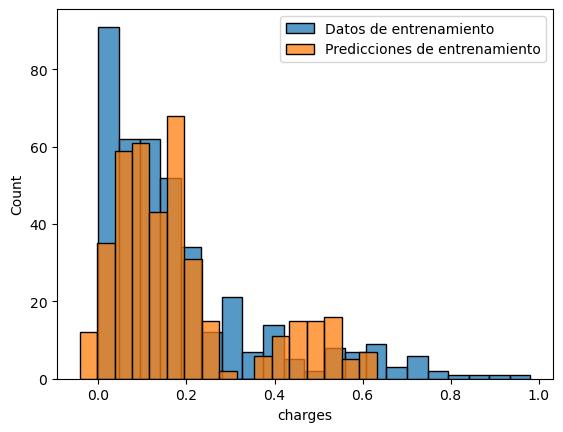

Las métricas de desempeño en test para Regresión Lineal son:
R2: 0.7607461458465344
RMSE: 0.09528328379291841
MAE: 0.06980541354934361
MAPE: 3409.531530373526
MAPE (personalizado): 340953.15%
SMAPE: 49.83%


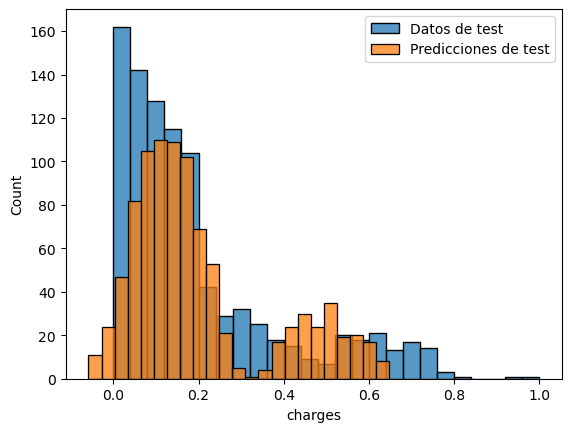

In [ ]:
pred_train_1, pred_test_1, y_train_des, y_test_des = predecir_y_desescalar(modelo_1, 
X_train, X_test, y_train, y_test, y)
mostrar_metricas(y_train_des, pred_train_1, y_test_des, pred_test_1, 
nombre_modelo="Regresión Lineal")

## K Vecinos mas cercanos

Las métricas de desempeño en entrenamiento para KNN son:
R2: 0.7936142109084676
RMSE: 0.0860138598643823
MAE: 0.05257841885456449
MAPE: 1.5008237742422221
MAPE (personalizado): 150.08%
SMAPE: 32.25%


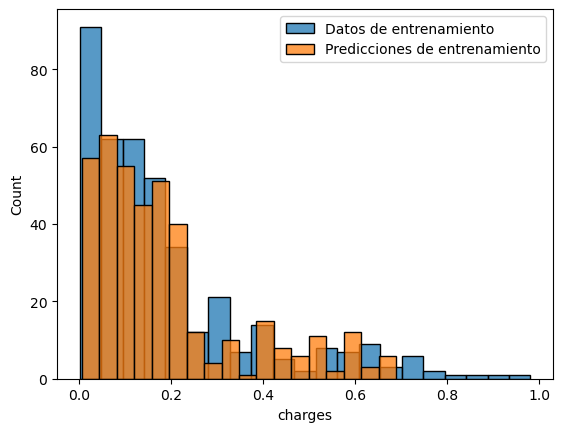

Las métricas de desempeño en test para KNN son:
R2: 0.7075144819807305
RMSE: 0.10535118585848852
MAE: 0.06644345603378596
MAPE: 5939.295815116459
MAPE (personalizado): 593929.58%
SMAPE: 38.80%


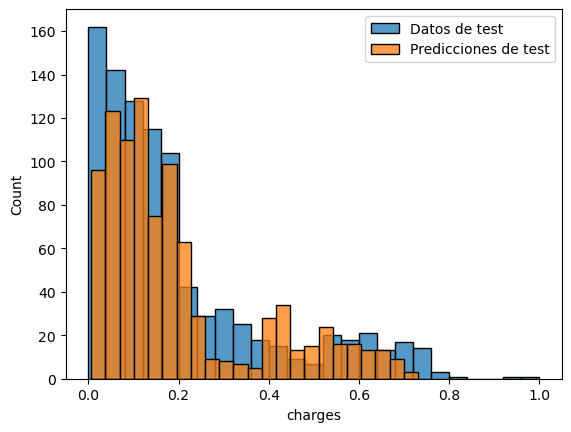

In [34]:
pred_train_2, pred_test_2, y_train_des, y_test_des = predecir_y_desescalar(modelo_2_final, X_train, X_test, y_train, y_test, y)
mostrar_metricas(y_train_des, pred_train_2, y_test_des, pred_test_2, nombre_modelo="KNN")

## Maquina de Soporte Vectorial

Las métricas de desempeño en entrenamiento para MSV son:
R2: 0.7041633070918791
RMSE: 0.10298039692266303
MAE: 0.07650670892162617
MAPE: 2.4143873930477553
MAPE (personalizado): 241.44%
SMAPE: 58.79%


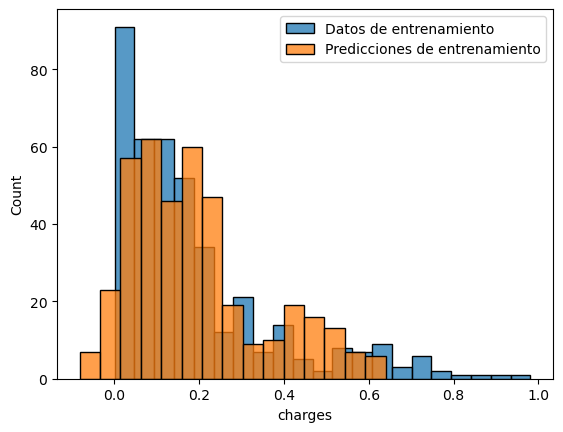

Las métricas de desempeño en test para MSV son:
R2: 0.7346453806274432
RMSE: 0.10034611682871246
MAE: 0.07911822112766553
MAPE: 4812.753747063834
MAPE (personalizado): 481275.37%
SMAPE: 58.87%


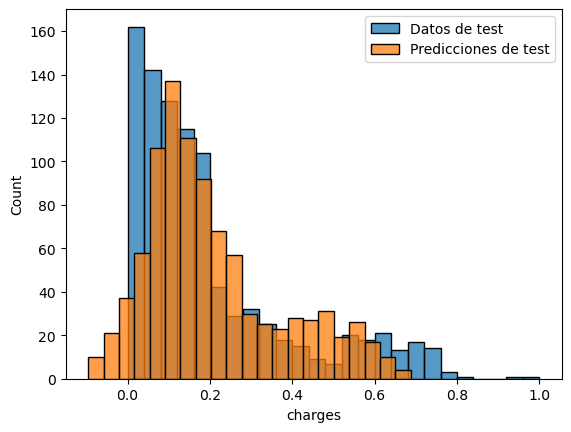

In [35]:
pred_train_3, pred_test_3, y_train_des, y_test_des = predecir_y_desescalar(modelo_3_final, X_train, X_test, y_train, y_test, y)
mostrar_metricas(y_train_des, pred_train_3, y_test_des, pred_test_3, nombre_modelo="MSV")

## Arbol de Regresion

Las métricas de desempeño en entrenamiento para Arbol Regresion son:
R2: 0.8767308264630704
RMSE: 0.06647460785901745
MAE: 0.024001719782048975
MAPE: 0.3314437701948819
MAPE (personalizado): 33.14%
SMAPE: 19.73%


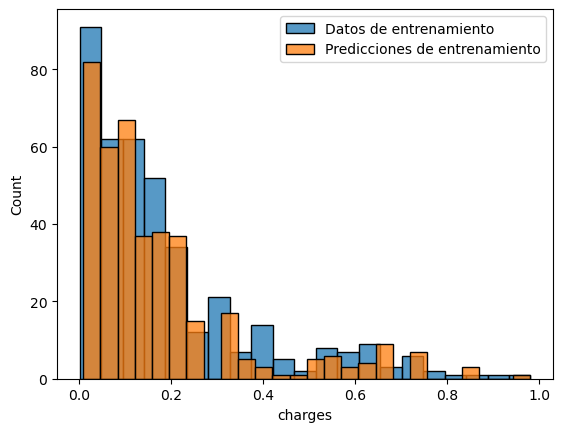

Las métricas de desempeño en test para Arbol Regresion son:
R2: 0.8370287801188874
RMSE: 0.07863985479546054
MAE: 0.03543524475662985
MAPE: 875.8211530112873
MAPE (personalizado): 87582.12%
SMAPE: 23.94%


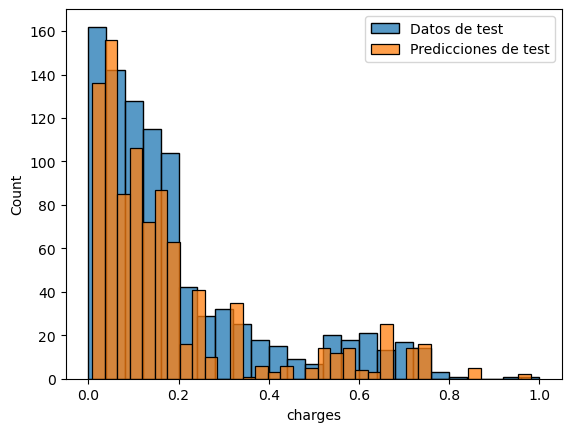

In [36]:
pred_train_4, pred_test_4, y_train_des, y_test_des = predecir_y_desescalar(modelo_4_final, X_train, X_test, y_train, y_test, y)
mostrar_metricas(y_train_des, pred_train_4, y_test_des, pred_test_4, nombre_modelo="Arbol Regresion")

## Bosque aleatorio

Las métricas de desempeño en entrenamiento para Random Forest son:
R2: 0.8406503970896702
RMSE: 0.07557950352083052
MAE: 0.03260178716934192
MAPE: 0.5551743038783091
MAPE (personalizado): 55.52%
SMAPE: 24.43%


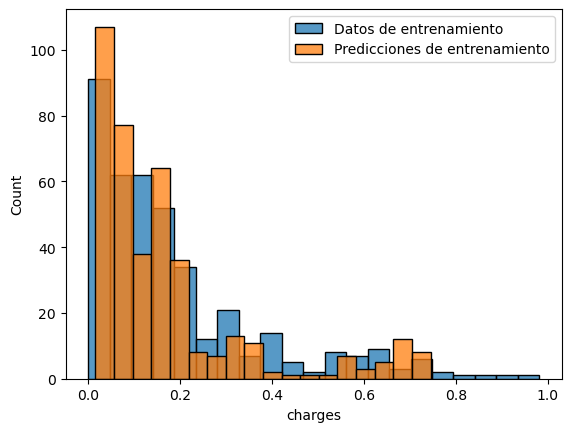

Las métricas de desempeño en test para Random Forest son:
R2: 0.8637537685501446
RMSE: 0.07190341113677882
MAE: 0.03248357008515388
MAPE: 1655.1433209105087
MAPE (personalizado): 165514.33%
SMAPE: 23.70%


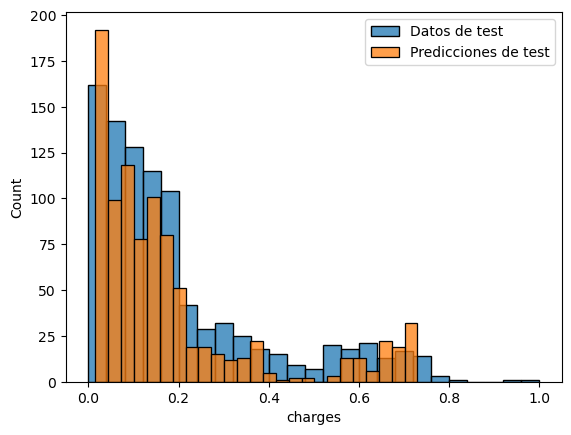

In [37]:
pred_train_5, pred_test_5, y_train_des, y_test_des = predecir_y_desescalar(modelo_5_final, X_train, X_test, y_train, y_test, y)
mostrar_metricas(y_train_des, pred_train_5, y_test_des, pred_test_5, nombre_modelo="Random Forest")

## Adaptative Boosting

Las métricas de desempeño en entrenamiento para Adaptative Boosting son:
R2: 0.8439557294040865
RMSE: 0.07479153655696576
MAE: 0.044321303467200604
MAPE: 1.5566181881139836
MAPE (personalizado): 155.66%
SMAPE: 39.26%


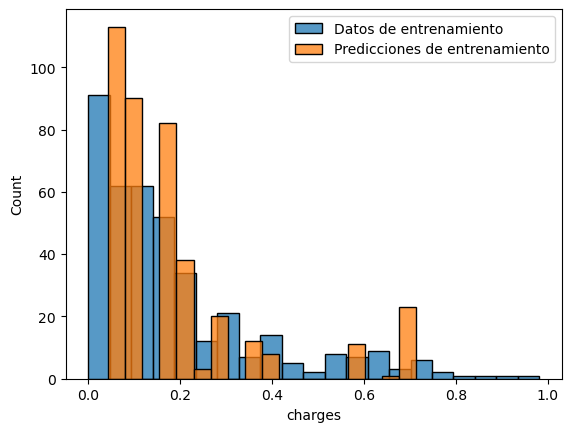

Las métricas de desempeño en test para Adaptative Boosting son:
R2: 0.8609465636534019
RMSE: 0.07264038003632843
MAE: 0.04345489838068407
MAPE: 4541.674233976442
MAPE (personalizado): 454167.42%
SMAPE: 36.38%


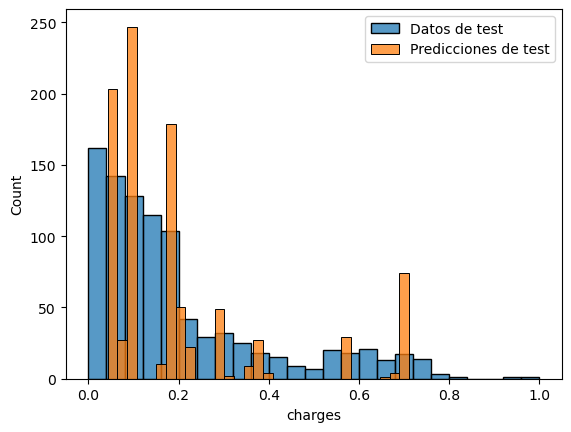

In [38]:
pred_train_6, pred_test_6, y_train_des, y_test_des = predecir_y_desescalar(modelo_6_final, X_train, X_test, y_train, y_test, y)
mostrar_metricas(y_train_des, pred_train_6, y_test_des, pred_test_6, nombre_modelo="Adaptative Boosting")

## Gradient Boosting

Las métricas de desempeño en entrenamiento para Gradient Boosting son:
R2: 0.8199688564347474
RMSE: 0.08033454939294608
MAE: 0.032213491274958254
MAPE: 0.11907190843698634
MAPE (personalizado): 11.91%
SMAPE: 14.33%


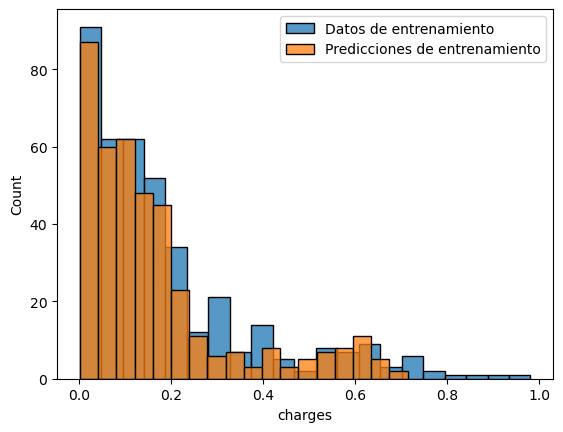

Las métricas de desempeño en test para Gradient Boosting son:
R2: 0.8240213595980258
RMSE: 0.08171790493579063
MAE: 0.036650886706326054
MAPE: 77.05149432371546
MAPE (personalizado): 7705.15%
SMAPE: 18.04%


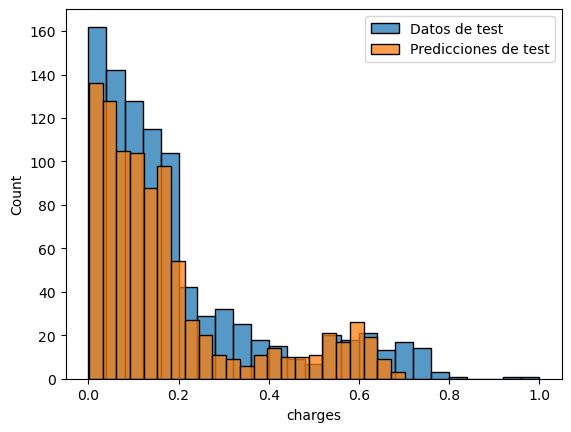

In [39]:
pred_train_7, pred_test_7, y_train_des, y_test_des = predecir_y_desescalar(modelo_7_final, X_train, X_test, y_train, y_test, y)
mostrar_metricas(y_train_des, pred_train_7, y_test_des, pred_test_7, nombre_modelo="Gradient Boosting")

## Perceptor multicapa

Las métricas de desempeño en entrenamiento para Perceptor Multicapa son:
R2: 0.298683944861146
RMSE: 0.15855700455573105
MAE: 0.11883352160855291
MAPE: 3.1438949620531274
MAPE (personalizado): 314.39%
SMAPE: 125.20%


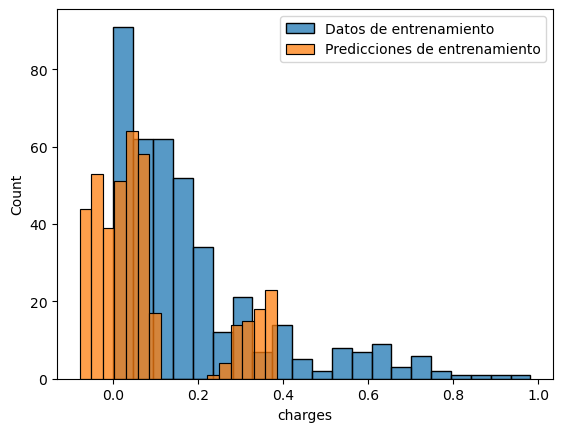

Las métricas de desempeño en test para Perceptor Multicapa son:
R2: 0.36706253448926807
RMSE: 0.15497714162491807
MAE: 0.11884304986958662
MAPE: 8835.635355015835
MAPE (personalizado): 883563.54%
SMAPE: 121.08%


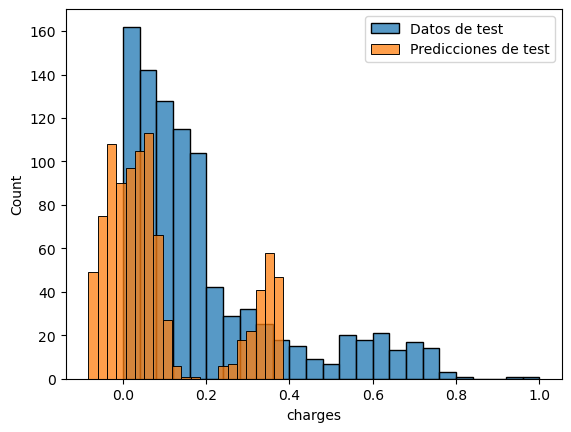

In [40]:
pred_train_8, pred_test_8, y_train_des, y_test_des = predecir_y_desescalar(modelo_8_final, X_train, X_test, y_train, y_test, y)
mostrar_metricas(y_train_des, pred_train_8, y_test_des, pred_test_8, nombre_modelo="Perceptor Multicapa")